In [4]:
# Read in dataframe
import pandas as pd
df = pd.read_csv(r'../data/PdM_merged.csv')

df_error = pd.read_csv(r'../data/PdM_errors.csv')

### Daten anschauen

In [5]:
df.head()

,datetime,machineID,volt,rotate,pressure,vibration,errorID,failure,comp,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,NaN,NaN,NaN,model3,18
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,NaN,NaN,NaN,model3,18
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,NaN,NaN,NaN,model3,18
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,NaN,NaN,NaN,model3,18
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,NaN,NaN,NaN,model3,18


In [6]:
df.describe()

,machineID,volt,rotate,pressure,vibration,age
count,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000
mean,50.498446,170.780942,446.570735,100.861433,40.386459,11.330280
std,28.866697,15.511268,52.698963,11.052195,5.371894,5.827535
min,1.000000,97.333604,138.432075,51.237106,14.877054,0.000000
25%,25.000000,160.305918,412.265479,93.499116,36.777911,7.000000
50%,50.000000,170.609301,447.537538,100.426820,40.238339,12.000000
75%,75.000000,181.008303,482.157025,107.557338,43.786484,16.000000
max,100.000000,255.124717,695.020984,185.951998,76.791072,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877209 entries, 0 to 877208
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   877209 non-null  object 
 1   machineID  877209 non-null  int64  
 2   volt       877209 non-null  float64
 3   rotate     877209 non-null  float64
 4   pressure   877209 non-null  float64
 5   vibration  877209 non-null  float64
 6   errorID    3924 non-null    object 
 7   failure    1122 non-null    object 
 8   comp       2968 non-null    object 
 9   model      877209 non-null  object 
 10  age        877209 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 73.6+ MB


### Alle Messwerte plotten (pro Tag / pro Monat)

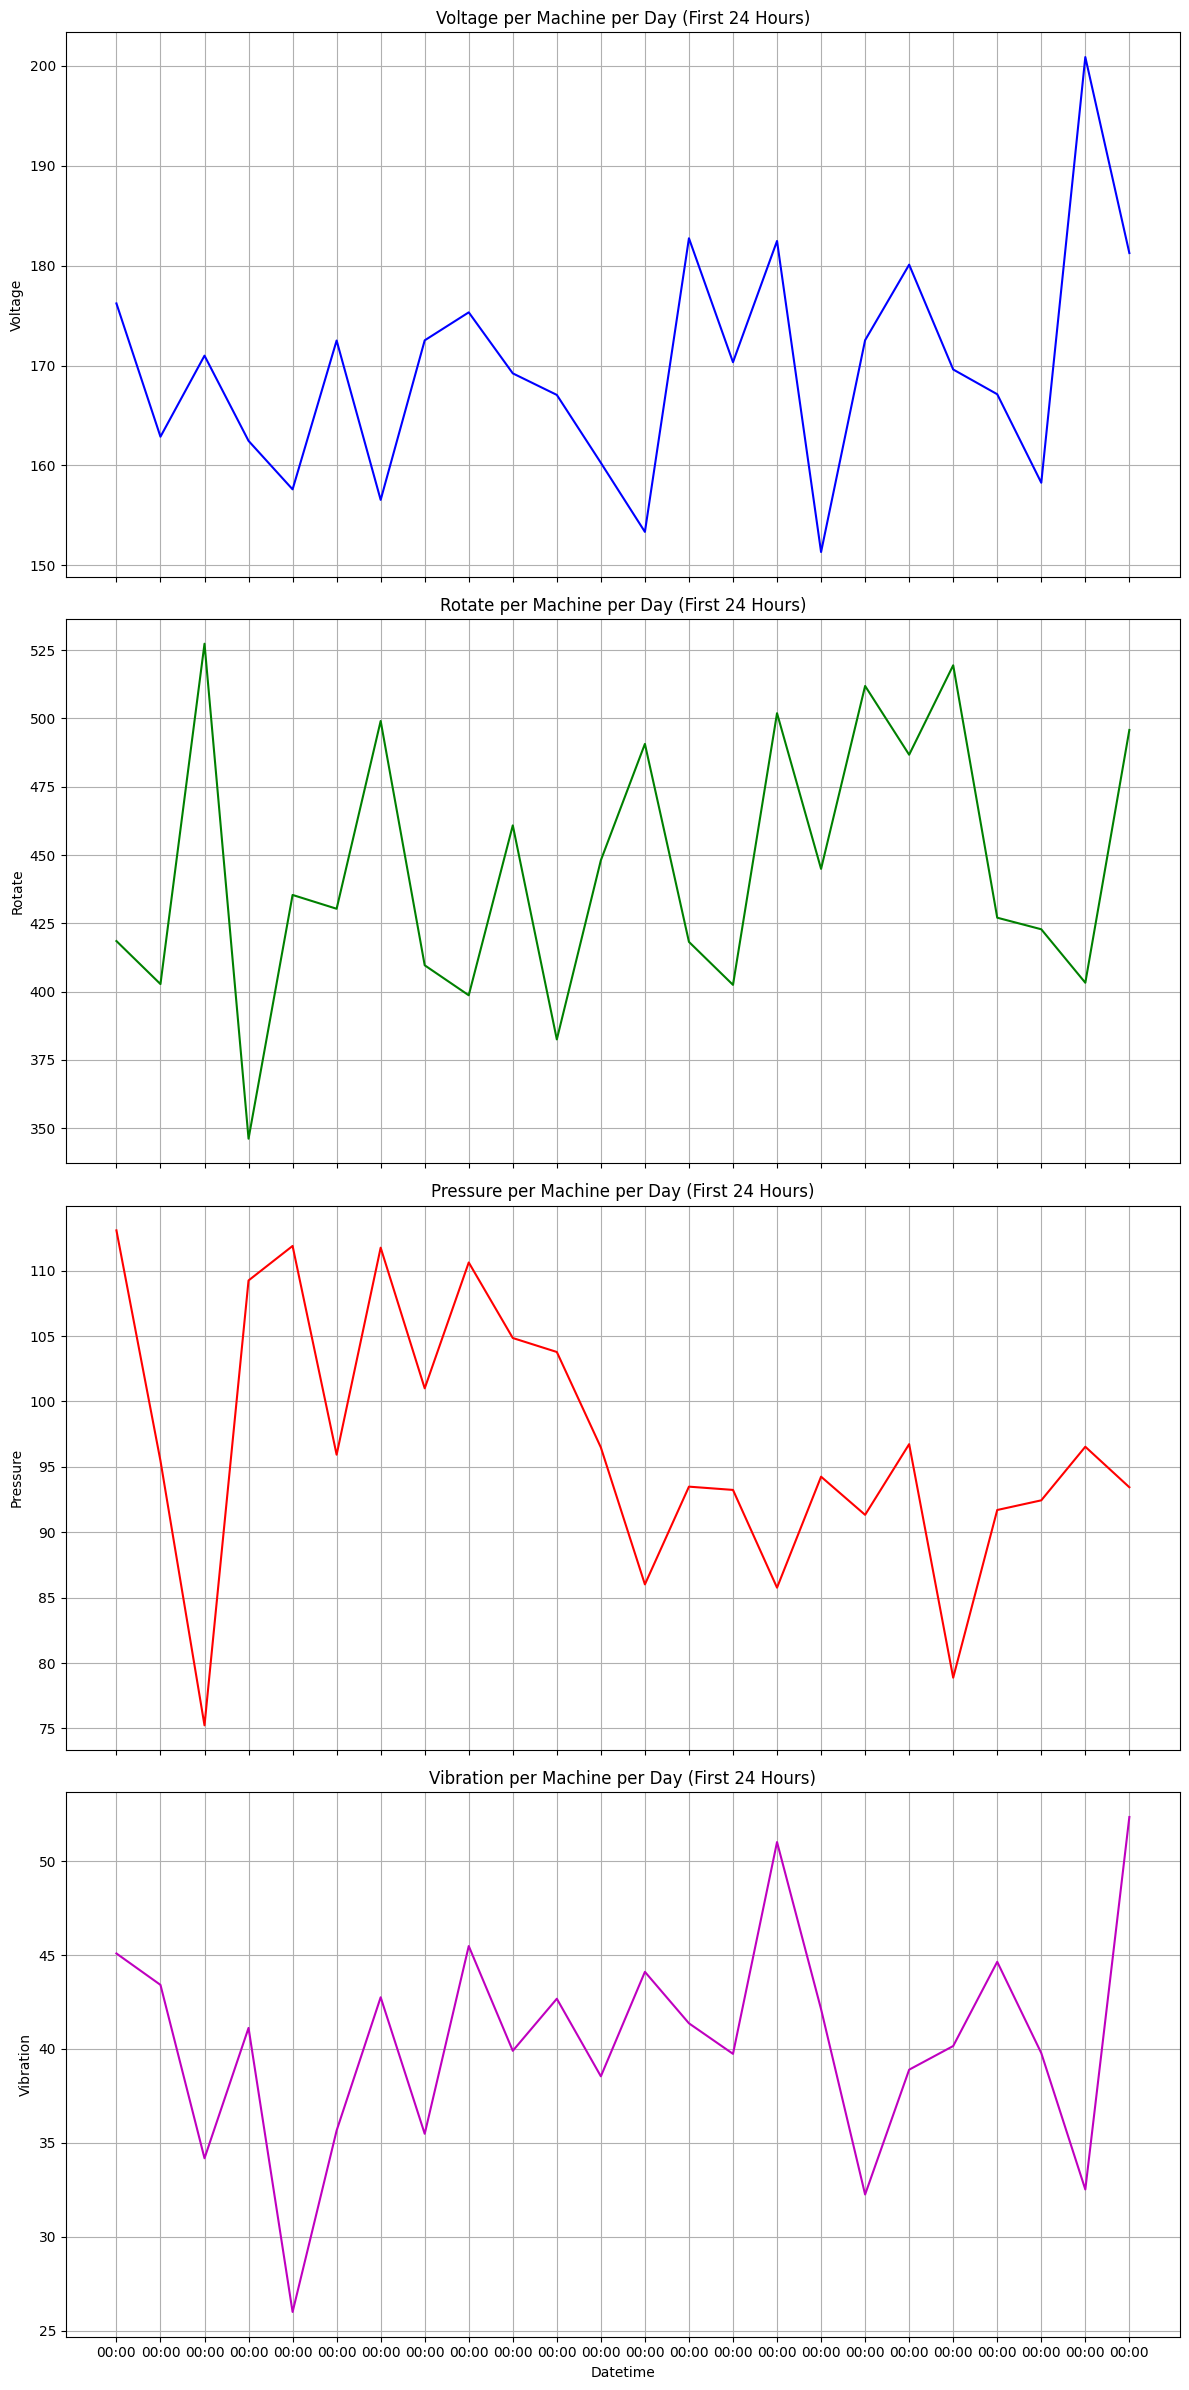

In [10]:
# Zeige Voltage, rotate, pressure und vibration in jeweils einem Plot
# Separate plots for each measurement
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%H:%M")

# Filter the data for the first 24 hours
df_filtered = df[(df['datetime'] >= '2015-01-01 06:00:00') & (df['datetime'] < '2015-01-02 06:00:00') & (df['machineID'] == 1)]
fig, axs = plt.subplots(4, 1, figsize=(12, 24), sharex=True)

# Voltage plot
sns.lineplot(x='datetime', y='volt', data=df_filtered, ax=axs[0], color='b')
axs[0].set_title('Voltage per Machine per Day (First 24 Hours)')
axs[0].set_ylabel('Voltage')
axs[0].grid(True)

# Rotate plot
sns.lineplot(x='datetime', y='rotate', data=df_filtered, ax=axs[1], color='g')
axs[1].set_title('Rotate per Machine per Day (First 24 Hours)')
axs[1].set_ylabel('Rotate')
axs[1].grid(True)

# Pressure plot
sns.lineplot(x='datetime', y='pressure', data=df_filtered, ax=axs[2], color='r')
axs[2].set_title('Pressure per Machine per Day (First 24 Hours)')
axs[2].set_ylabel('Pressure')
axs[2].grid(True)

# Vibration plot
sns.lineplot(x='datetime', y='vibration', data=df_filtered, ax=axs[3], color='m')
axs[3].set_title('Vibration per Machine per Day (First 24 Hours)')
axs[3].set_ylabel('Vibration')
axs[3].set_xlabel('Datetime')
axs[3].grid(True)

# Format the x-axis to show only hours
for ax in axs:
    ax.xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

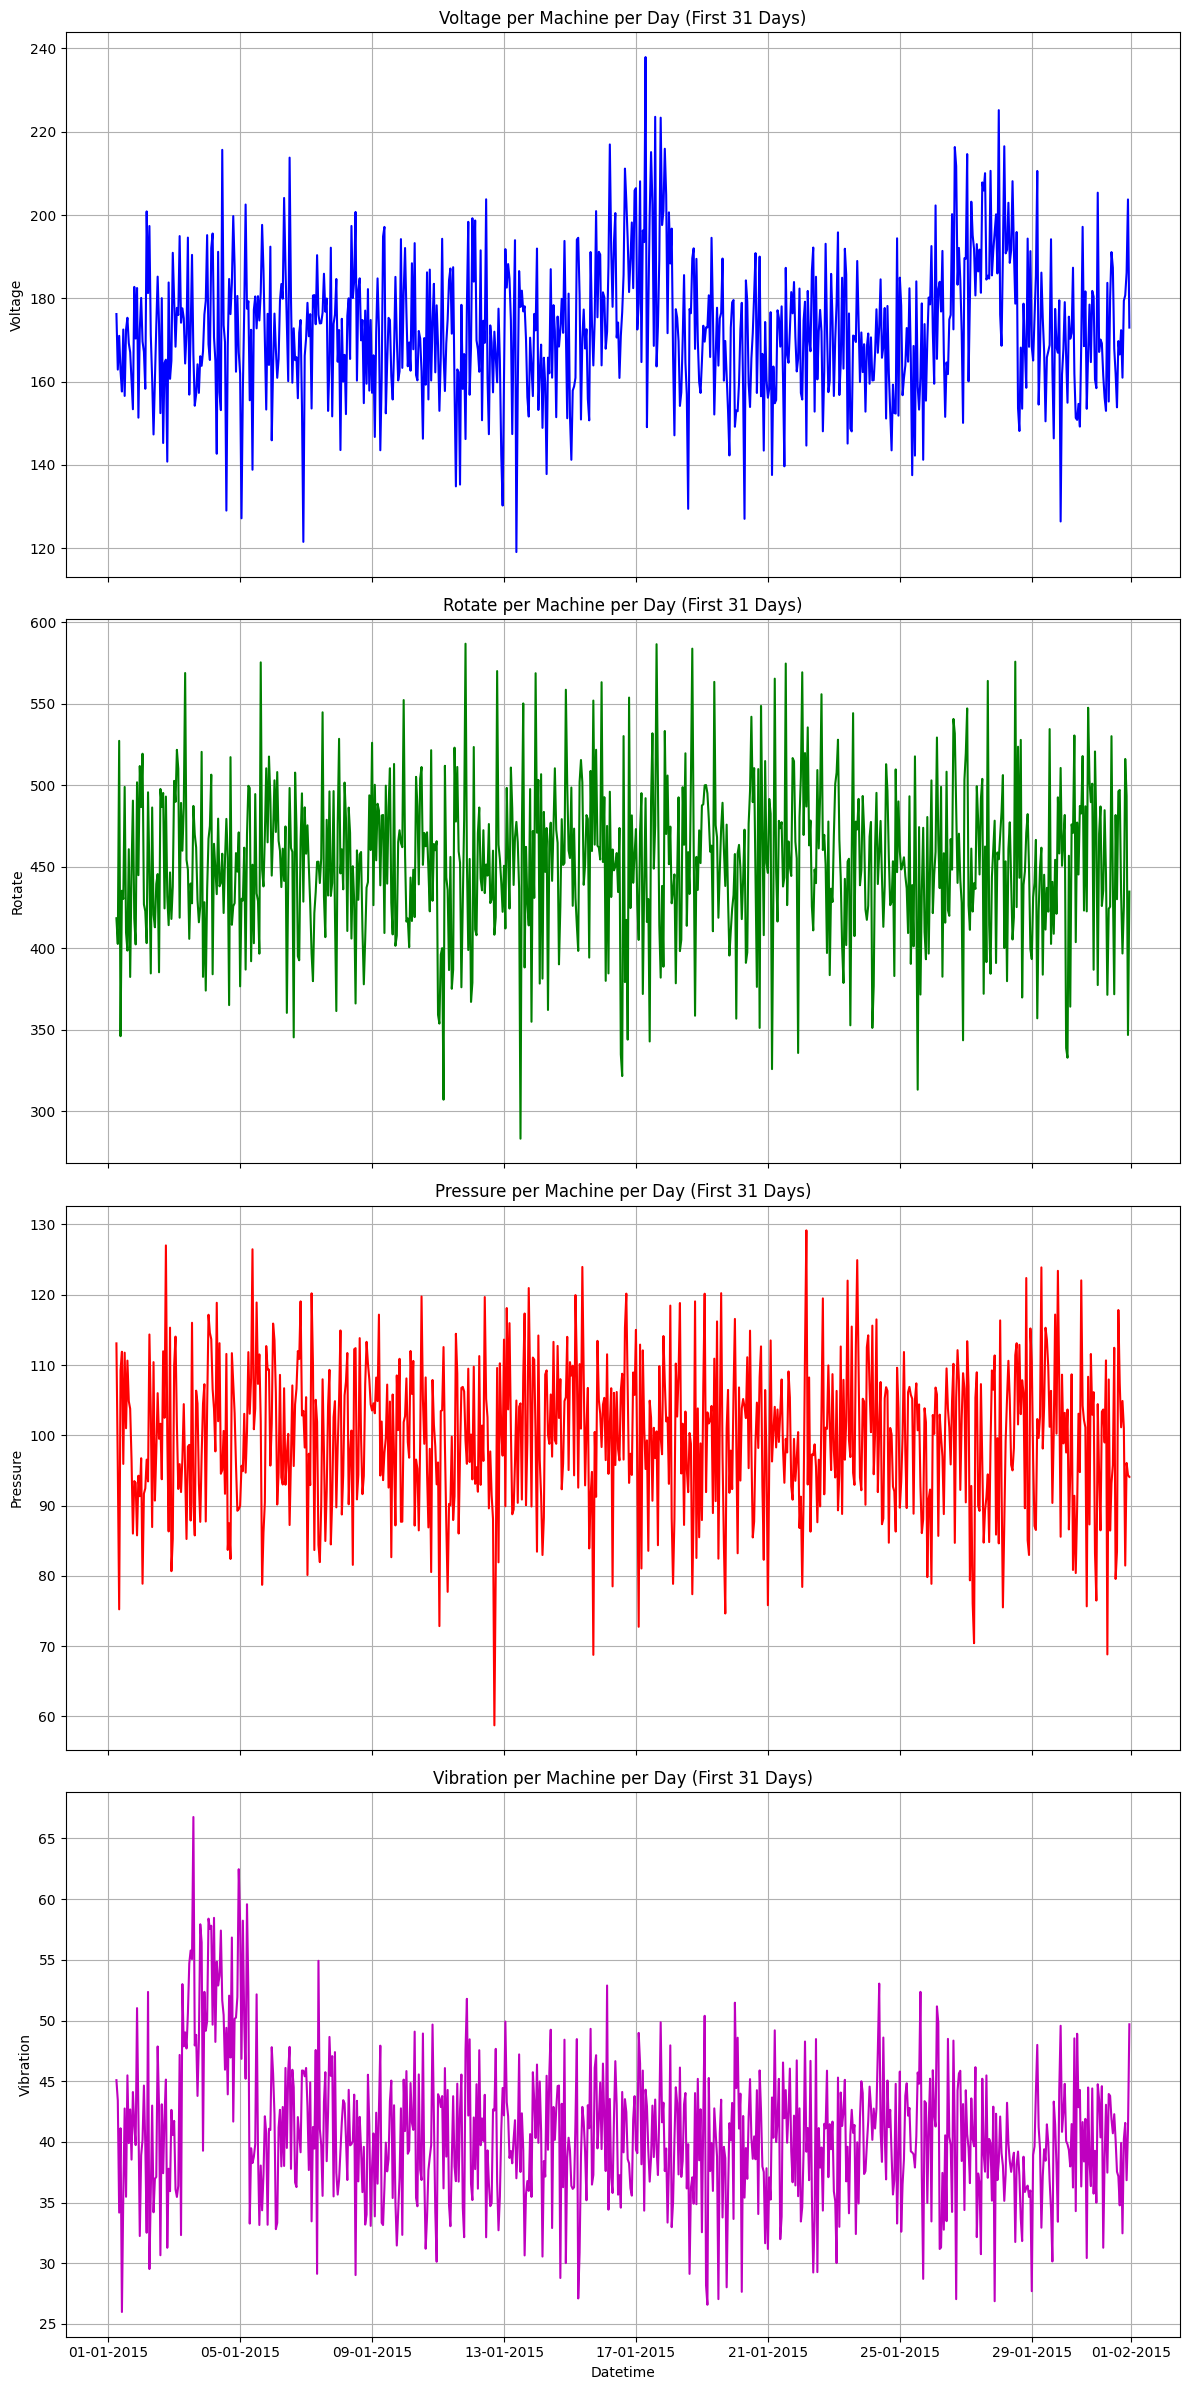

In [ ]:
# Zeige Voltage, rotate, pressure und vibration in jeweils einem Plot
# Separate plots for each measurement

from matplotlib.dates import DateFormatter
date_format = DateFormatter("%d-%m-%Y")

# Filter the data for the first 31 days
df_filtered = df[(df['datetime'] >= '2015-01-01 06:00:00') & (df['datetime'] < '2015-01-31 23:59:00') & (df['machineID'] == 1)]
fig, axs = plt.subplots(4, 1, figsize=(12, 24), sharex=True)

# Voltage plot
sns.lineplot(x='datetime', y='volt', data=df_filtered, ax=axs[0], color='b')
axs[0].set_title('Voltage per Machine per Day (First 31 Days)')
axs[0].set_ylabel('Voltage')
axs[0].grid(True)

# Rotate plot
sns.lineplot(x='datetime', y='rotate', data=df_filtered, ax=axs[1], color='g')
axs[1].set_title('Rotate per Machine per Day (First 31 Days)')
axs[1].set_ylabel('Rotate')
axs[1].grid(True)

# Pressure plot
sns.lineplot(x='datetime', y='pressure', data=df_filtered, ax=axs[2], color='r')
axs[2].set_title('Pressure per Machine per Day (First 31 Days)')
axs[2].set_ylabel('Pressure')
axs[2].grid(True)

# Vibration plot
sns.lineplot(x='datetime', y='vibration', data=df_filtered, ax=axs[3], color='m')
axs[3].set_title('Vibration per Machine per Day (First 31 Days)')
axs[3].set_ylabel('Vibration')
axs[3].set_xlabel('Datetime')
axs[3].grid(True)

# Format the x-axis to show only days
for ax in axs:
    ax.xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

### Größte und kleinste Ausprägungen pro Attribut anzeigen

In [ ]:
min_timestamp = df['datetime'].min()
max_timestamp = df['datetime'].max()

print(f'Minimum timestamp: {min_timestamp}')
print(f'Maximum timestamp: {max_timestamp}\n')

min_volt = df['volt'].min()
max_volt = df['volt'].max()

print(f'Minimum voltage: {min_volt:.2f}')
print(f'Maximum voltage: {max_volt:.2f}\n')

min_rotate = df['rotate'].min()
max_rotate = df['rotate'].max()

print(f'Minimum rotate: {min_rotate:.2f}')
print(f'Maximum rotate: {max_rotate:.2f}\n')

min_pressure = df['pressure'].min()
max_pressure = df['pressure'].max()

print(f'Minimum pressure: {min_pressure:.2f}')
print(f'Maximum pressure: {max_pressure:.2f}\n')

min_vibration = df['vibration'].min()
max_vibration = df['vibration'].max()

print(f'Minimum vibration: {min_vibration:.2f}')
print(f'Maximum vibration: {max_vibration:.2f}\n')

min_age = df['age'].min()
max_age = df['age'].max()

print(f'Minimum age: {min_age:.2f}')
print(f'Maximum age: {max_age:.2f}')

Minimum timestamp: 2015-01-01 06:00:00
Maximum timestamp: 2016-01-01 06:00:00

Minimum voltage: 97.33
Maximum voltage: 255.12

Minimum rotate: 138.43
Maximum rotate: 695.02

Minimum pressure: 51.24
Maximum pressure: 185.95

Minimum vibration: 14.88
Maximum vibration: 76.79

Minimum age: 0.00
Maximum age: 20.00


### Korrelation

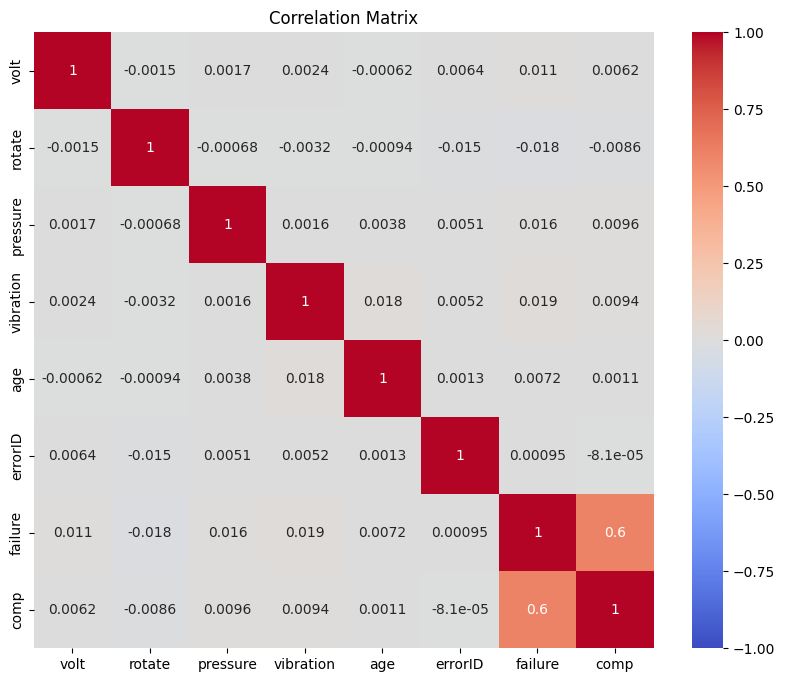

In [ ]:
# Formal alle String von errorID, failure, comp in int umwandeln (beachte NaN werte als 0 sonst 1)
db_bfr = df.copy()
db_bfr['errorID'] = db_bfr['errorID'].apply(lambda x: 0 if pd.isnull(x) else 1)
db_bfr['failure'] = db_bfr['failure'].apply(lambda x: 0 if pd.isnull(x) else 1)
db_bfr['comp'] = db_bfr['comp'].apply(lambda x: 0 if pd.isnull(x) else 1)
correlation = db_bfr[['volt', 'rotate', 'pressure', 'vibration', 'age', 'errorID', 'failure', 'comp']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

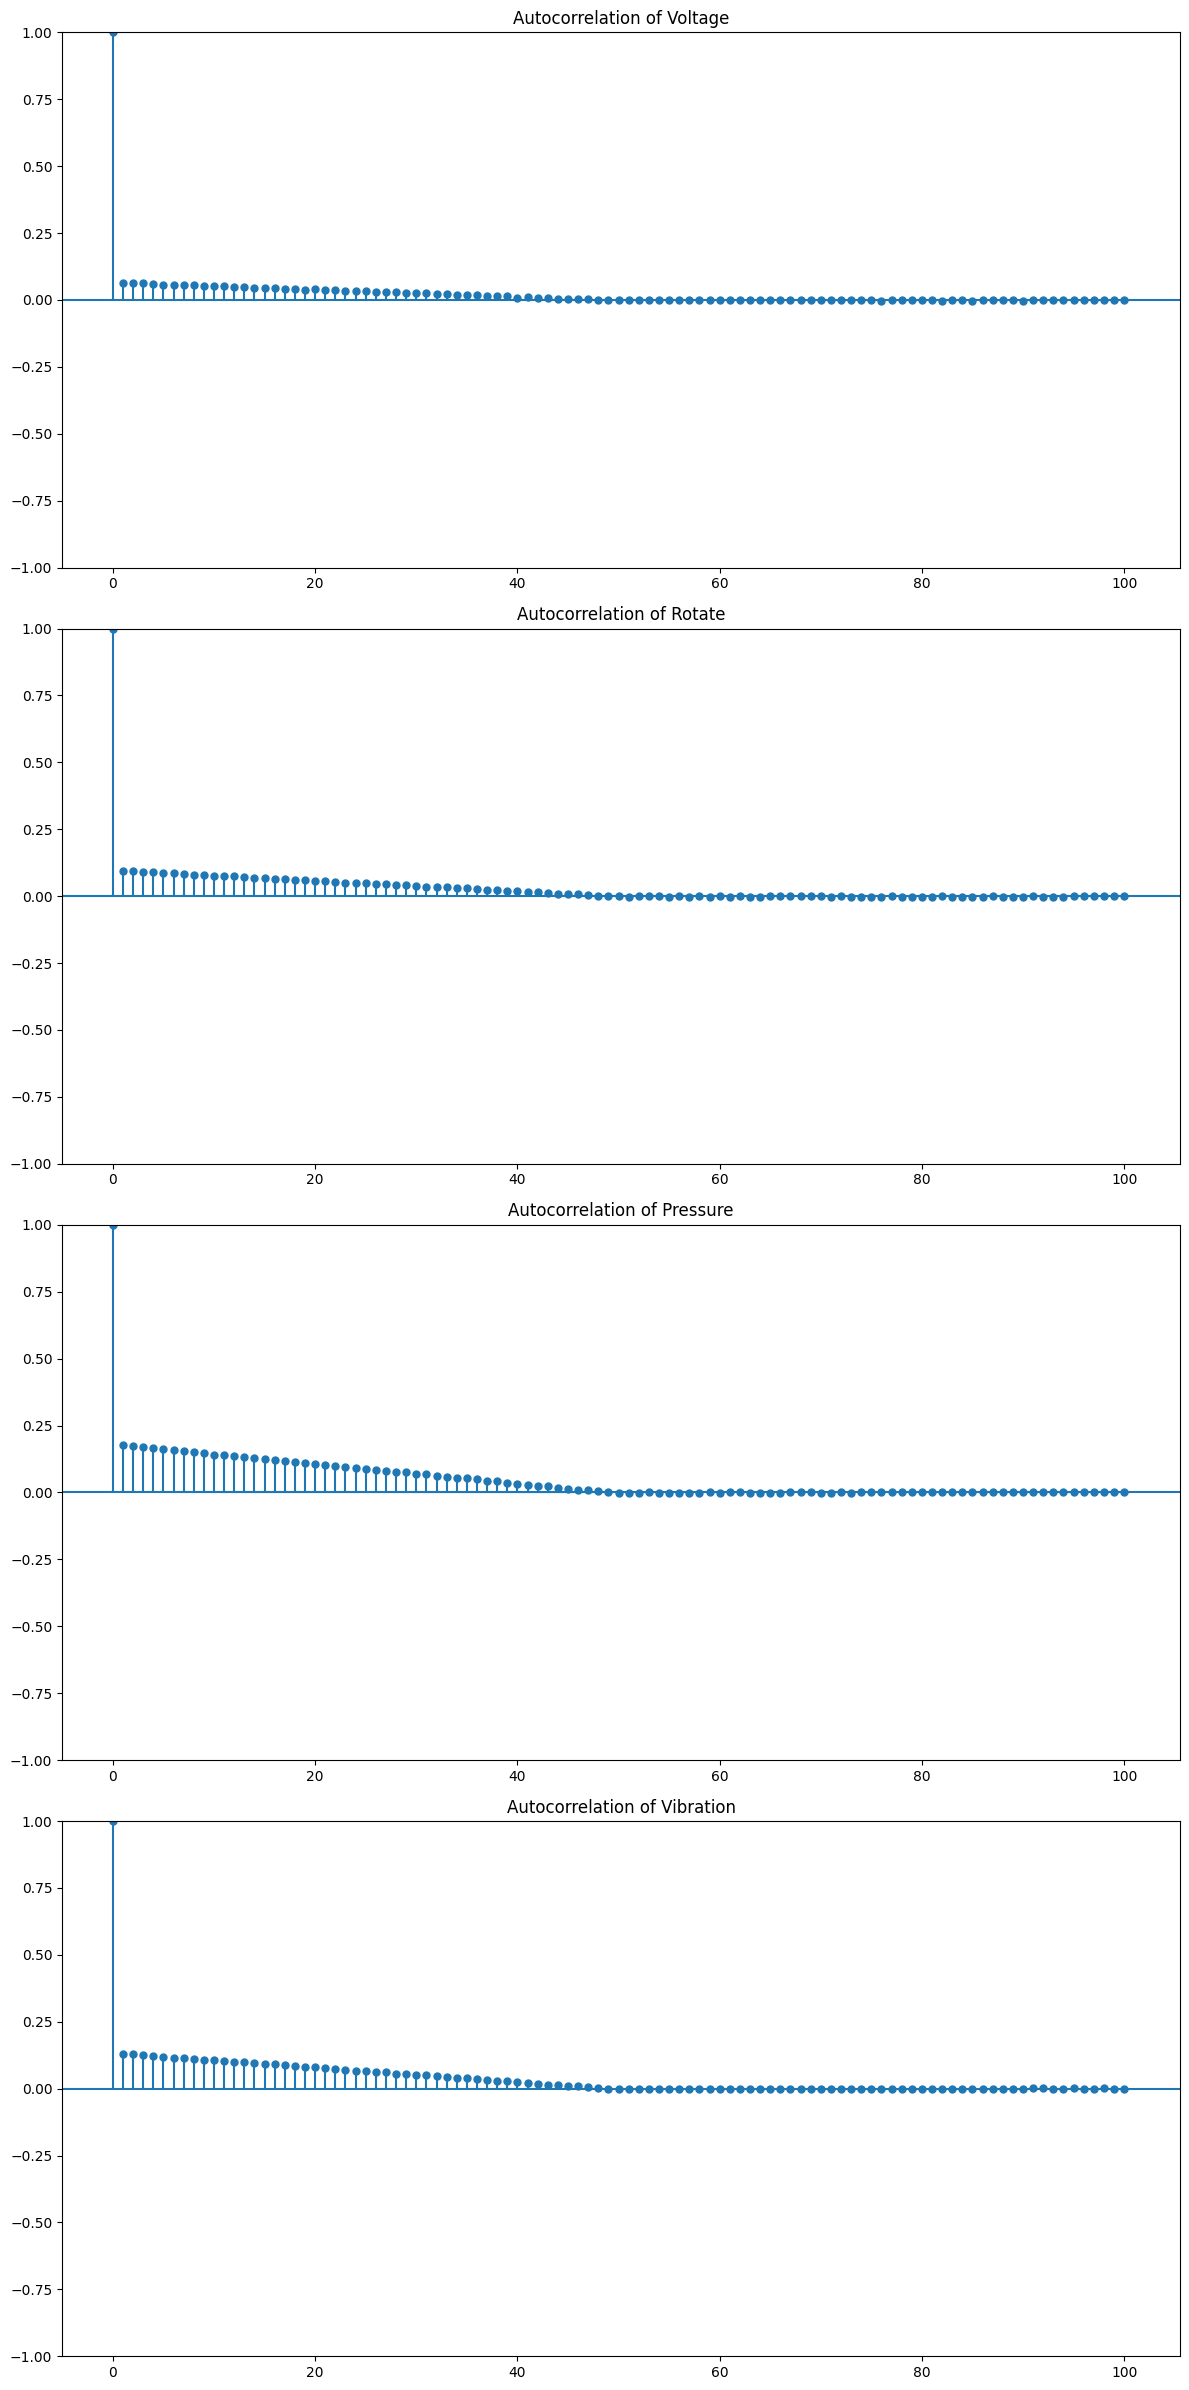

In [33]:
# Autokorrelation von Volt, Rotate, Pressure und Vibration (Korrelation mit sich selbst in Bezug auf Zeit)

from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(4, 1, figsize=(12, 24))

# Autokorrelation von Volt
plot_acf(df['volt'], lags=100, ax=axs[0])
axs[0].set_title('Autocorrelation of Voltage')

# Autokorrelation von Rotate
plot_acf(df['rotate'], lags=100, ax=axs[1])
axs[1].set_title('Autocorrelation of Rotate')

# Autokorrelation von Pressure
plot_acf(df['pressure'], lags=100, ax=axs[2])
axs[2].set_title('Autocorrelation of Pressure')

# Autokorrelation von Vibration
plot_acf(df['vibration'], lags=100, ax=axs[3])
axs[3].set_title('Autocorrelation of Vibration')

plt.tight_layout()
plt.show()


### Ausfälle pro Maschine

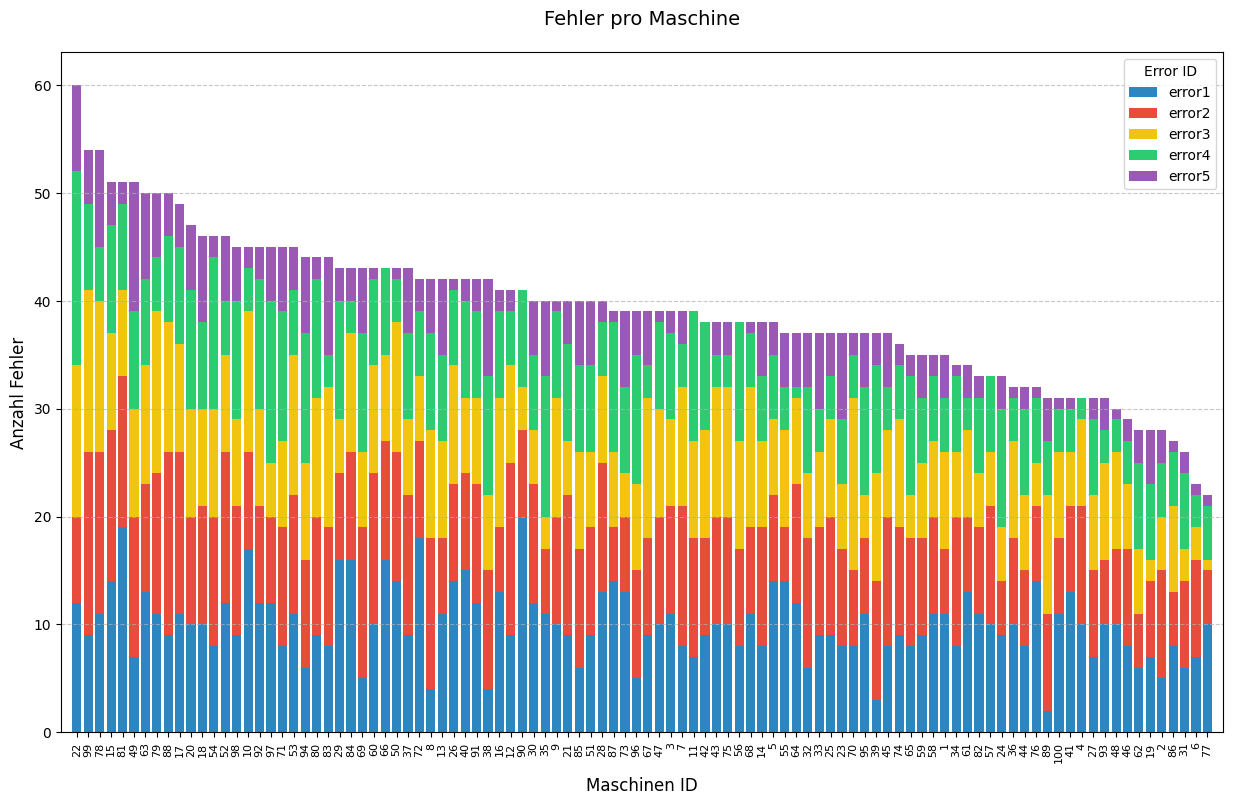

In [ ]:
import numpy as np

# Anzahl Ausfälle pro Maschine und errorID als DataFrame erstellen und sortieren
failure_count = df_error.groupby(['machineID', 'errorID']).size().unstack(fill_value=0)
failure_count_sorted = failure_count.sum(axis=1).sort_values(ascending=False)

# Figur mit angepasster Größe erstellen
plt.figure(figsize=(15, 10))  # Höhe vergrößert für mehr Platz unten

# Balkendiagramm erstellen
bottom = np.zeros(len(failure_count_sorted))
colors = ['#2E86C1', '#E74C3C', '#F1C40F', '#2ECC71', '#9B59B6']  # Farben für verschiedene errorIDs

for i, errorID in enumerate(failure_count.columns):
    values = failure_count.loc[failure_count_sorted.index, errorID]
    plt.bar(range(len(failure_count_sorted)), values, bottom=bottom, color=colors[i % len(colors)], label=errorID)
    bottom += values

# X-Achsen-Labels mit den entsprechenden Maschinen-IDs
plt.xticks(range(len(failure_count_sorted)), failure_count_sorted.index, 
           rotation=90,  # Vertikale Labels
           ha='center',  # Zentrierte Ausrichtung
           fontsize=8)   # Kleinere Schriftgröße

plt.title('Fehler pro Maschine', fontsize=14, pad=20)
plt.xlabel('Maschinen ID', fontsize=12, labelpad=10)  # Mehr Abstand nach unten
plt.ylabel('Anzahl Fehler', fontsize=12)

# Gitter hinzufügen
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ränder anpassen
plt.margins(x=0.01)

# Extra Platz unten für die Labels
plt.subplots_adjust(bottom=0.2)  # Mehr Platz unten

# Legende hinzufügen
plt.legend(title='Error ID')

plt.show()

### Anzahl an Fehlerklassen

C:\Users\EnzoZ\AppData\Local\Temp\ipykernel_18532\2388545320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='errorID', data=df_error, order=df_error['errorID'].value_counts().index, palette=colors)


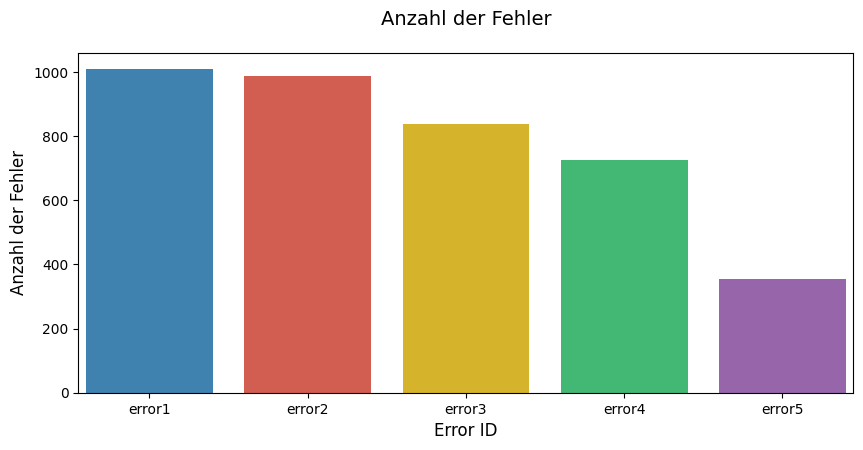

In [ ]:
plt.figure(figsize=(10, 5))

# Balkendiagramm erstellen mit x = Error-Klasse und y = Anzahl der Fehler
sns.countplot(x='errorID', data=df_error, order=df_error['errorID'].value_counts().index, palette=colors)

plt.title('Anzahl der Fehler', fontsize=14, pad=20)
plt.ylabel('Anzahl der Fehler', fontsize=12)
plt.xlabel('Error ID', fontsize=12)

plt.margins(x=0.01)
plt.subplots_adjust(bottom=0.2)
plt.show()


C:\Users\EnzoZ\AppData\Local\Temp\ipykernel_18532\1041381537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='failure', data=df, order=df['failure'].value_counts().index, palette=colors)
C:\Users\EnzoZ\AppData\Local\Temp\ipykernel_18532\1041381537.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(x='failure', data=df, order=df['failure'].value_counts().index, palette=colors)


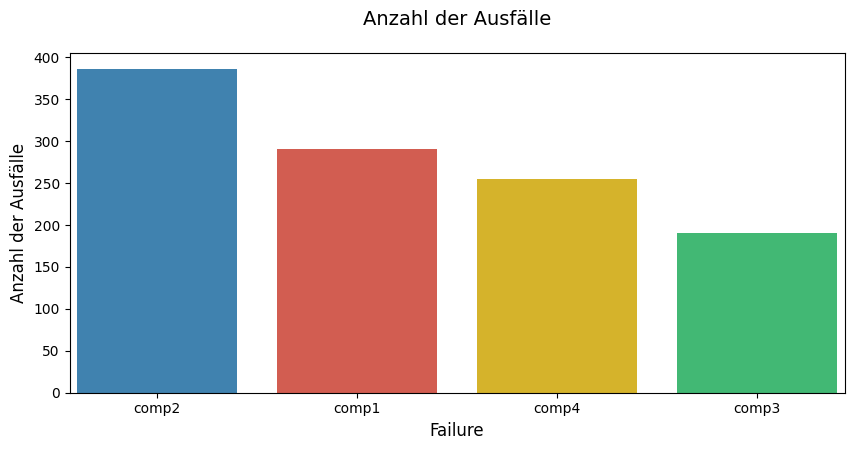

In [ ]:
plt.figure(figsize=(10, 5))

# Balkendiagramm erstellen mit x = Error-Klasse und y = Anzahl der Fehler
sns.countplot(x='failure', data=df, order=df['failure'].value_counts().index, palette=colors)

plt.title('Anzahl der Ausfälle', fontsize=14, pad=20)
plt.ylabel('Anzahl der Ausfälle', fontsize=12)
plt.xlabel('Failure', fontsize=12)

plt.margins(x=0.01)
plt.subplots_adjust(bottom=0.2)
plt.show()

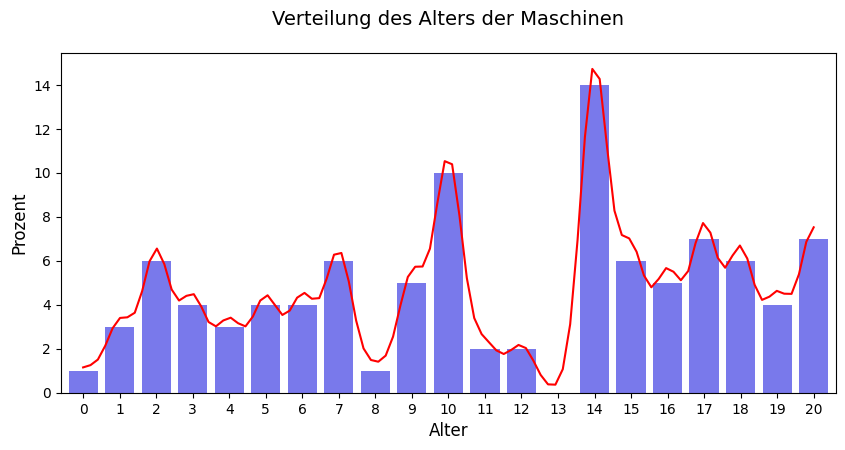

In [18]:
from scipy.stats import gaussian_kde
import numpy as np

# Verteilung des Alters der Maschinen in Prozent
age_distribution = df['age'].value_counts(normalize=True) * 100

# Alter 13 mit 0% hinzufügen
age_distribution = age_distribution.reindex(range(21), fill_value=0)

plt.figure(figsize=(10, 5))

# Balkendiagramm erstellen mit x = Alter und y = Prozent
sns.barplot(x=age_distribution.index, y=age_distribution.values, color='b', alpha=0.6)

# Density Kurve hinzufügen
age_values = df['age'].values
kde = gaussian_kde(age_values)
age_range = np.linspace(age_values.min(), age_values.max(), 100)
age_density = kde(age_range) * 100  # Skalieren auf Prozent

plt.plot(age_range, age_density, color='r')

plt.title('Verteilung des Alters der Maschinen', fontsize=14, pad=20)
plt.ylabel('Prozent', fontsize=12)
plt.xlabel('Alter', fontsize=12)

plt.margins(x=0.01)
plt.subplots_adjust(bottom=0.2)
plt.show()

### Linearer Zusammenhang (Regression) mit Anzahl an Ausfällen und Alter der Maschine

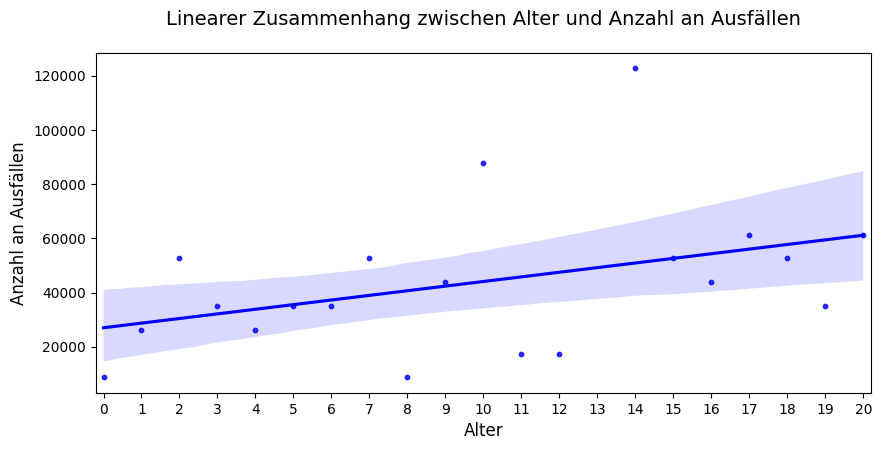

Die Funktion der Geraden lautet: y = 1707.3372559332063x + 27043.178029057915


In [32]:
# „Linearer Zusammenhang (Regression) mit Anzahl an Ausfällen und Alter der Maschine“

# Zuerst summiere die Anzahl an Ausfälle pro Alter
age_error_count = df.groupby('age').size()

# Erstelle ein lineare Darstellung mit Trend (x-Achse = age und y = Anzahl an Ausfälle)
plt.figure(figsize=(10, 5))

sns.regplot(x=age_error_count.index, y=age_error_count.values, color='b', scatter_kws={'s': 10})

plt.title('Linearer Zusammenhang zwischen Alter und Anzahl an Ausfällen', fontsize=14, pad=20)
plt.ylabel('Anzahl an Ausfällen', fontsize=12)
plt.xlabel('Alter', fontsize=12)

# Setze die x-Achse, um jedes Jahr als Strich darzustellen
plt.xticks(ticks=range(age_error_count.index.min(), age_error_count.index.max() + 1))

plt.margins(x=0.01)
plt.subplots_adjust(bottom=0.2)
plt.show()
# Berechne die Regressionsgerade
X = age_error_count.index.values.reshape(-1, 1)
y = age_error_count.values

# Erstelle das Modell und trainiere es
model = LinearRegression()
model.fit(X, y)

# Ausgabe der Funktion der Geraden
m = model.coef_[0]
b = model.intercept_
print(f"Die Funktion der Geraden lautet: y = {m}x + {b}")